In [1]:
#importando bibliotecas
import pandas as pd
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Criando o DF
#df = pd.read_csv('../Trabalho UX/Tabela_unificada.csv', sep=',', encoding='ANSI',low_memory=False)
df = pd.read_csv('../Trabalho UX/Tabela_com_selecao_features.csv', sep=',', encoding='ANSI',low_memory=False)

In [3]:
df.isnull().sum()

Area                                                                               0
Year                                                                               0
Cost of a healthy diet (PPP dollar per person per day)                           220
Coefficient of human inequality                                                  235
Human Development Index (value)                                                   92
Inequality in eduation                                                           170
Inequality in income                                                             192
Inequality in life expectancy                                                     82
2.a.1 Agriculture share of Government Expenditure                                145
2.a.1 Agriculture value added share of GDP                                        72
6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322))                 168
6.4.1 Water Use Efficiency (Industries)                          

In [4]:
# Filtrandp nulos na coluna "Percentage of the population unable to afford a healthy diet (percent)"
paises_nulos = df[df['Percentage of the population unable to afford a healthy diet (percent)'].isnull()]['Area'].unique()

print(f"Número de países com valores nulos: {len(paises_nulos)}")
print("Lista de países com valores nulos:")
print(paises_nulos)

Número de países com valores nulos: 69
Lista de países com valores nulos:
['Afghanistan' 'American Samoa' 'Andorra' 'Antigua and Barbuda'
 'Argentina' 'Bahamas' 'Bahrain' 'Barbados' 'Bermuda' 'Aruba'
 'Solomon Islands' 'Brunei Darussalam' 'Cayman Islands' 'Comoros'
 'Cook Islands' 'Cuba' 'Dominica' 'El Salvador' 'Equatorial Guinea'
 'French Polynesia' 'Georgia' 'Kiribati' 'Greenland' 'Grenada' 'Guatemala'
 'Cambodia' "Democratic People's Republic of Korea" 'Kuwait' 'Lebanon'
 'Libya' 'Marshall Islands' 'Montserrat'
 'Micronesia (Federated States of)' 'Nauru' 'New Caledonia' 'Vanuatu'
 'New Zealand' 'Niue' 'Papua New Guinea' 'Timor-Leste' 'Puerto Rico'
 'Eritrea' 'Qatar' 'Palau' 'Zimbabwe' 'Saint Kitts and Nevis'
 'Saint Vincent and the Grenadines' 'Saudi Arabia' 'Singapore' 'Somalia'
 'Syrian Arab Republic' 'Turkmenistan' 'Togo' 'Tokelau' 'Tonga' 'Oman'
 'Turks and Caicos Islands' 'Tuvalu' 'Ukraine' 'Uzbekistan'
 'Venezuela (Bolivarian Republic of)' 'British Virgin Islands' 'Samoa'
 'Y

In [5]:
# Remover linhas com valores nulos na variável alvo para todos os países, exceto Argentina e Nova Zelândia
df_limpo = df[~df['Area'].isin(paises_nulos) | df['Area'].isin(['Argentina', 'New Zealand']) | df['Percentage of the population unable to afford a healthy diet (percent)'].notna()]
df_limpo.isnull().sum()

Area                                                                              0
Year                                                                              0
Cost of a healthy diet (PPP dollar per person per day)                            4
Coefficient of human inequality                                                  33
Human Development Index (value)                                                   5
Inequality in eduation                                                           11
Inequality in income                                                             27
Inequality in life expectancy                                                     5
2.a.1 Agriculture share of Government Expenditure                                27
2.a.1 Agriculture value added share of GDP                                        5
6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322))                 16
6.4.1 Water Use Efficiency (Industries)                                     

In [6]:
paises_nulos2 = df_limpo[df_limpo['Percentage of the population unable to afford a healthy diet (percent)'].isnull()]['Area'].unique()

print(f"Número de países com valores nulos: {len(paises_nulos2)}")
print("Lista de países com valores nulos:")
print(paises_nulos2)

Número de países com valores nulos: 2
Lista de países com valores nulos:
['Argentina' 'New Zealand']


In [7]:
# Visão Global (2021)

# Filtrar dados para o ano de 2021
df_2021 = df_limpo[df_limpo['Year'] == 2021]
# Obter os 10 piores e 10 melhores países em termos de porcentagem de população incapaz de pagar por uma dieta saudável
piores_paises = df_2021.nlargest(10, 'Percentage of the population unable to afford a healthy diet (percent)')
melhores_paises = df_2021.nsmallest(10, 'Percentage of the population unable to afford a healthy diet (percent)')


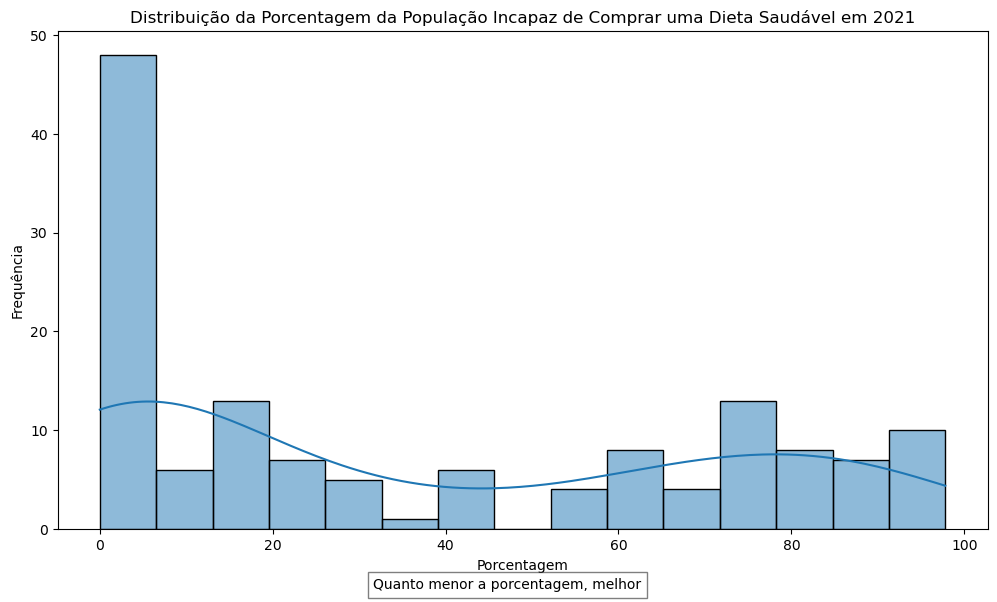

In [8]:
# Criando o histograma com a linha KDE
plt.figure(figsize=(12, 6))
sns.histplot(df_2021['Percentage of the population unable to afford a healthy diet (percent)'],bins=15, kde=True)

# Adicionando título e rótulos
plt.title('Distribuição da Porcentagem da População Incapaz de Comprar uma Dieta Saudável em 2021')
plt.xlabel('Porcentagem')
plt.ylabel('Frequência')

# Adicionando um texto explicativo
# Adicionando um texto explicativo abaixo do rótulo do eixo X
plt.figtext(0.5, -0.05, 'Quanto menor a porcentagem, melhor', 
            ha='center', fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.5))

# Ajustando a posição da plotagem para dar espaço ao texto
plt.subplots_adjust(bottom=0.05)
# Exibindo o gráfico
plt.show()

In [9]:
#dtale.show(df_2021)

In [10]:
#teste gráfico
import plotly.graph_objs as go
import plotly.express as px

fig = go.Figure(data=[go.Scatter3d(
    x=df['Year'],
    y=df['Area'],
    z=df['Percentage of the population unable to afford a healthy diet (percent)'],
    mode='markers',
    text=df['Area'],
    marker=dict(
        size=2,
        color=df['Percentage of the population unable to afford a healthy diet (percent)'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(title='% da População Incapaz de Comprar uma Dieta Saudável por Ano e oais',
                  scene=dict(
                      xaxis_title='Ano',
                      yaxis_title='Pais',
                      zaxis_title='Pprcentagem'
                  ))
fig.show()

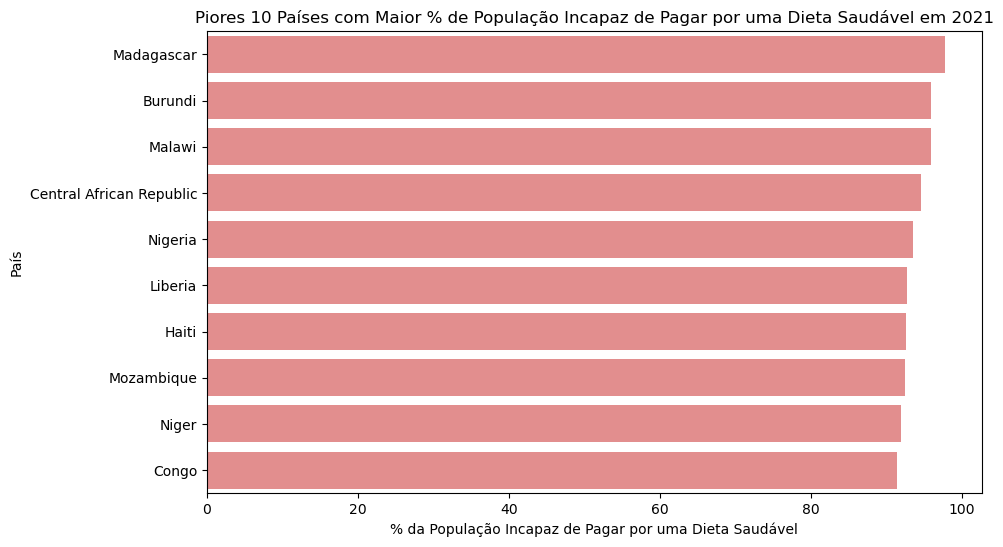

In [11]:
# Gráfico para os 10 piores países
plt.figure(figsize=(10, 6))
sns.barplot(data=piores_paises, x='Percentage of the population unable to afford a healthy diet (percent)', y='Area', color='lightcoral')
plt.title('Piores 10 Países com Maior % de População Incapaz de Pagar por uma Dieta Saudável em 2021')
plt.xlabel('% da População Incapaz de Pagar por uma Dieta Saudável')
plt.ylabel('País')
plt.show()

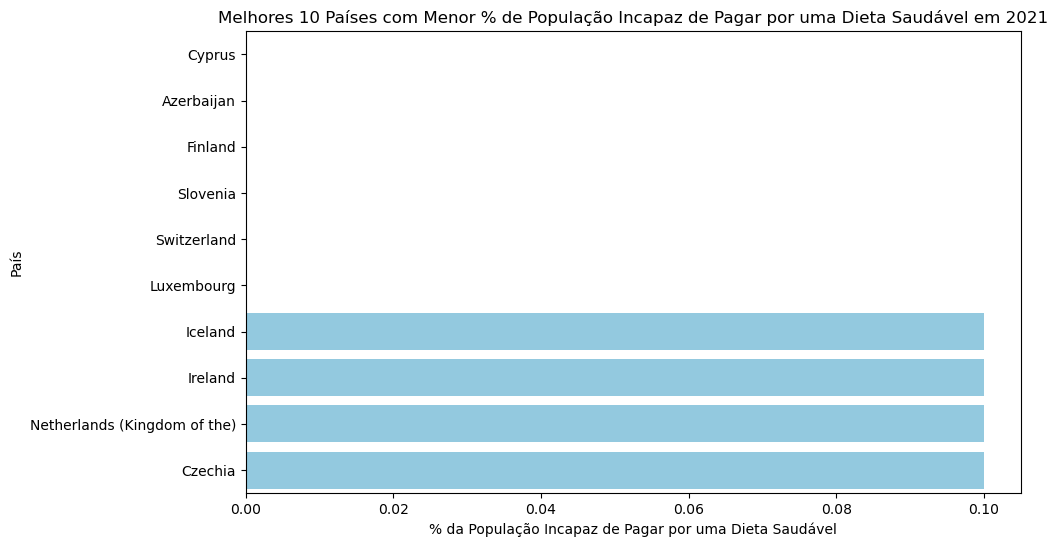

In [12]:
# Gráfico para os 10 melhores países
plt.figure(figsize=(10, 6))
sns.barplot(data=melhores_paises, x='Percentage of the population unable to afford a healthy diet (percent)', y='Area', color='skyblue')
plt.title('Melhores 10 Países com Menor % de População Incapaz de Pagar por uma Dieta Saudável em 2021')
plt.xlabel('% da População Incapaz de Pagar por uma Dieta Saudável')
plt.ylabel('País')
plt.show()

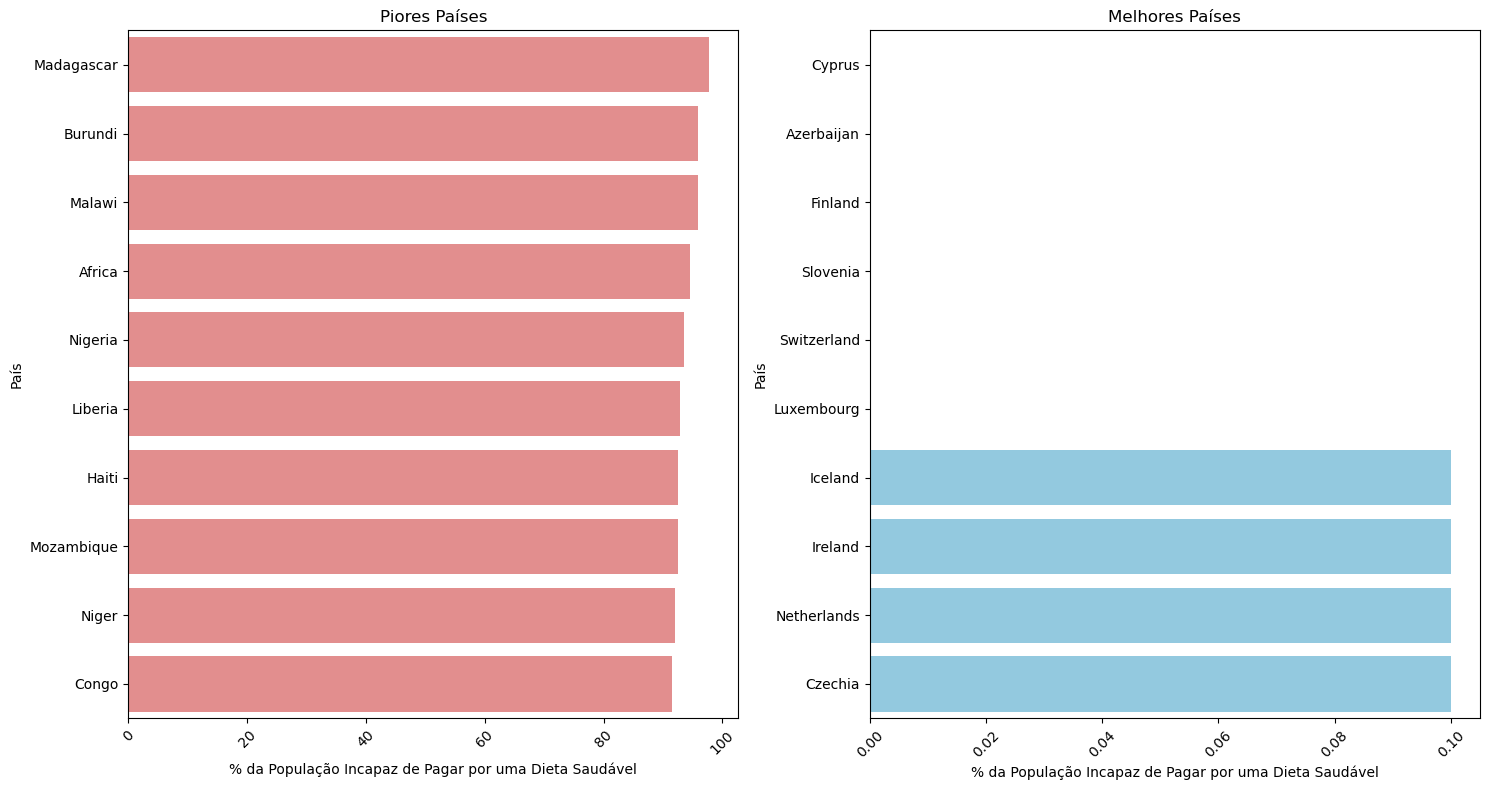

In [13]:
# Adicionar uma coluna para identificar se o país está no grupo dos melhores ou piores
piores_paises['Grupo'] = 'Piores'
melhores_paises['Grupo'] = 'Melhores'
melhores_paises['Area'] = melhores_paises['Area'].replace('Netherlands (Kingdom of the)', 'Netherlands')
piores_paises['Area'] = piores_paises['Area'].replace('Central African Republic', 'Africa')

# Combinar os dois dataframes
df_combinedo = pd.concat([piores_paises, melhores_paises])

# ordenação dos dados combinados
df_combinedo = df_combinedo.sort_values(by='Percentage of the population unable to afford a healthy diet (percent)', ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# piores países
sns.barplot(ax=ax[0], data=piores_paises, x='Percentage of the population unable to afford a healthy diet (percent)', y='Area', color='lightcoral')
ax[0].set_title('Piores Países')
ax[0].set_xlabel('% da População Incapaz de Pagar por uma Dieta Saudável')
ax[0].set_ylabel('País')
ax[0].tick_params(axis='x', rotation=45)

# melhores países
sns.barplot(ax=ax[1], data=melhores_paises, x='Percentage of the population unable to afford a healthy diet (percent)', y='Area', color='skyblue')
ax[1].set_title('Melhores Países')
ax[1].set_xlabel('% da População Incapaz de Pagar por uma Dieta Saudável')
ax[1].set_ylabel('País')
ax[1].tick_params(axis='x', rotation=45)

# Ajustando o layout
plt.tight_layout()
plt.show()

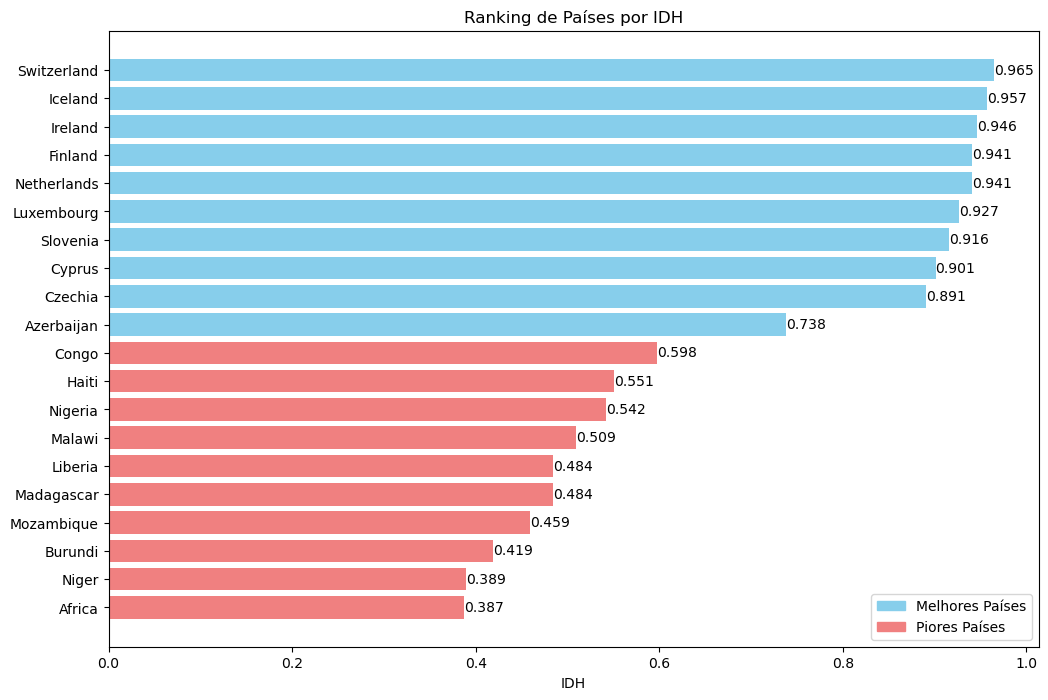

In [14]:
#criando gráfico de IDH para mostrar a relação com a % da população que ao consegue comprar uma dieta saudavel
idh_rank = pd.concat([melhores_paises, piores_paises])

#realizando ordenação
idh_rank = idh_rank.sort_values(by='Human Development Index (value)', ascending=False)
# Definindo cores diferentes para os melhores e piores países
colors = ['skyblue' if area in melhores_paises['Area'].values else 'lightcoral' for area in idh_rank['Area']]

# Criando gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.barh(idh_rank['Area'], idh_rank['Human Development Index (value)'], color=colors)
plt.xlabel('IDH')
plt.title('Ranking de Países por IDH')
plt.gca().invert_yaxis()

# Adicionando os rótulos
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.3f}', va='center', ha='left')

# Adicionando legenda
import matplotlib.patches as mpatches
skyblue_patch = mpatches.Patch(color='skyblue', label='Melhores Países')
lightcoral_patch = mpatches.Patch(color='lightcoral', label='Piores Países')
plt.legend(handles=[skyblue_patch, lightcoral_patch])

plt.show()

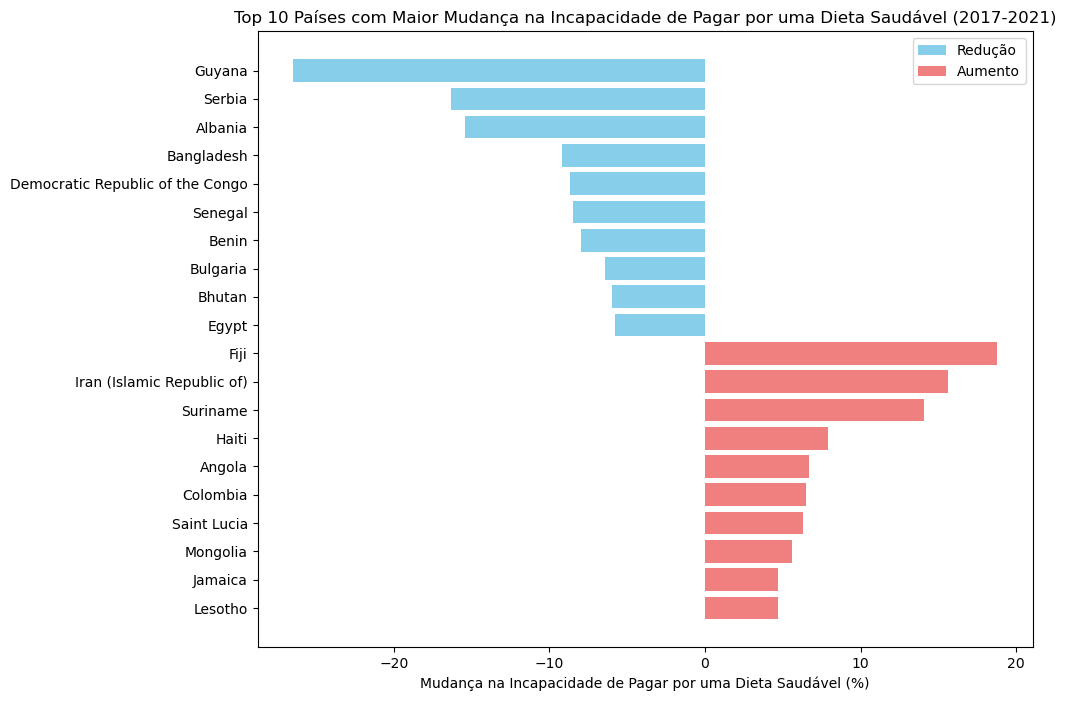

In [15]:
# Países com a maior evolução de 2017 a 2021
df_change = df[df['Year'].isin([2017, 2021])]
df_pivot = df_change.pivot(index='Area', columns='Year', values='Percentage of the population unable to afford a healthy diet (percent)')
df_pivot['change'] = df_pivot[2021] - df_pivot[2017]

# Maiores evoluções (reduções na prevalência de desnutrição)
top_evol = df_pivot.nsmallest(10, 'change')

# Maiores involuções (aumentos na prevalência de desnutrição)
top_invol = df_pivot.nlargest(10, 'change')

plt.figure(figsize=(10, 8))

# Evoluções (reduções na variável alvo)
plt.barh(top_evol.index, top_evol['change'], color='skyblue', label='Redução')
# Involuções (aumentos na variável alvo)
plt.barh(top_invol.index, top_invol['change'], color='lightcoral', label='Aumento')

plt.xlabel('Mudança na Incapacidade de Pagar por uma Dieta Saudável (%)')
plt.title('Top 10 Países com Maior Mudança na Incapacidade de Pagar por uma Dieta Saudável (2017-2021)')
plt.legend()
plt.gca().invert_yaxis()  # Inverter o eixo y para começar do maior para o menor


plt.show()

In [16]:
# Ranking do Brasil em 2021
brazil_2021 = df_2021[df_2021['Area'] == 'Brazil']
brazil_rank_2021 = df_2021['Percentage of the population unable to afford a healthy diet (percent)'].rank(method='min', ascending=False)
brazil_rank = brazil_rank_2021.loc[brazil_2021.index].values[0]

print(f'Ranking do Brasil em 2021: {int(brazil_rank)}º')

Ranking do Brasil em 2021: 69º


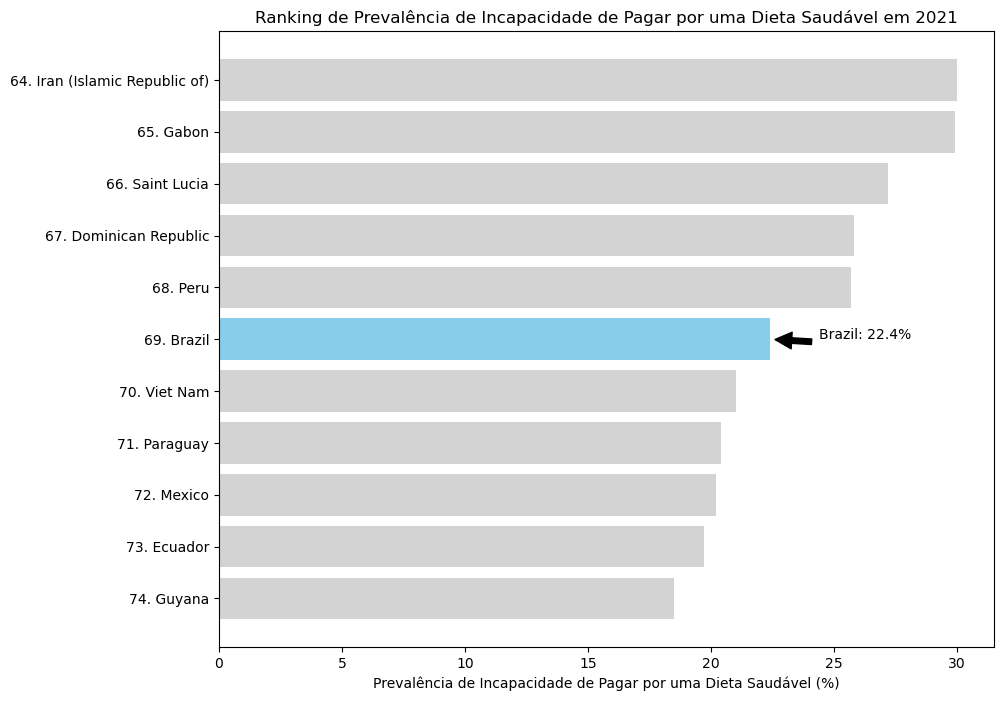

In [17]:
# Classificar os países pela prevalência da variável alvo em 2021
df_2021_sorted = df_2021.sort_values(by='Percentage of the population unable to afford a healthy diet (percent)', ascending=False)

# Adicionar uma coluna de ranking
df_2021_sorted['Ranking'] = df_2021_sorted['Percentage of the population unable to afford a healthy diet (percent)'].rank(method='min', ascending=False)

# Encontrar o ranking do Brasil
brazil_2021 = df_2021_sorted[df_2021_sorted['Area'] == 'Brazil']
brazil_rank = int(brazil_2021['Ranking'].values[0])

# Selecionar 5 países acima e 5 abaixo do Brasil no ranking
start_index = max(0, brazil_rank - 6)
end_index = min(len(df_2021_sorted), brazil_rank + 5)

df_filtrado = df_2021_sorted.iloc[start_index:end_index]

# Adicionar a posição do ranking ao nome do país
df_filtrado['Area'] = df_filtrado.apply(lambda row: f"{int(row['Ranking'])}. {row['Area']}", axis=1)

# Plotar o gráfico de barras com a posição do Brasil e os 5 países acima e abaixo
fig, ax = plt.subplots(figsize=(10, 8))

# Plotar todos os países e destacar o Brasil
colors = ['skyblue' if 'Brazil' in country else 'lightgray' for country in df_filtrado['Area']]
ax.barh(df_filtrado['Area'], df_filtrado['Percentage of the population unable to afford a healthy diet (percent)'], color=colors)
ax.set_xlabel('Prevalência de Incapacidade de Pagar por uma Dieta Saudável (%)')
ax.set_title('Ranking de Prevalência de Incapacidade de Pagar por uma Dieta Saudável em 2021')

# Destacar a posição do Brasil
brazil_pos = brazil_2021['Percentage of the population unable to afford a healthy diet (percent)'].values[0]
ax.annotate(f'Brazil: {brazil_pos}%', xy=(brazil_pos, 5), xytext=(brazil_pos + 2, 5),
            arrowprops=dict(facecolor='black', shrink=0.1))

plt.gca().invert_yaxis()  # Inverter a ordem dos países, maior menor.
plt.show()

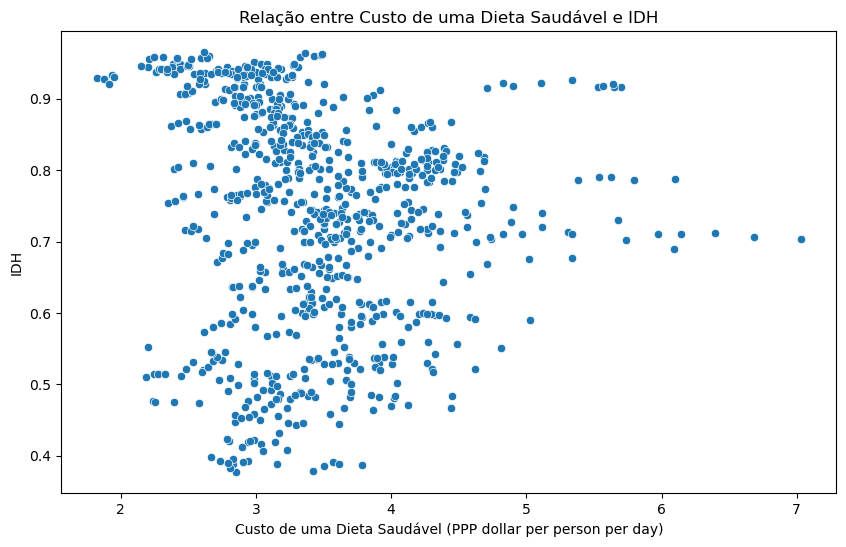

In [18]:
# Scatter plot entre custo de uma dieta saudável e IDH
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost of a healthy diet (PPP dollar per person per day)', y='Human Development Index (value)', data=df)
plt.title('Relação entre Custo de uma Dieta Saudável e IDH')
plt.xlabel('Custo de uma Dieta Saudável (PPP dollar per person per day)')
plt.ylabel('IDH')
plt.show()

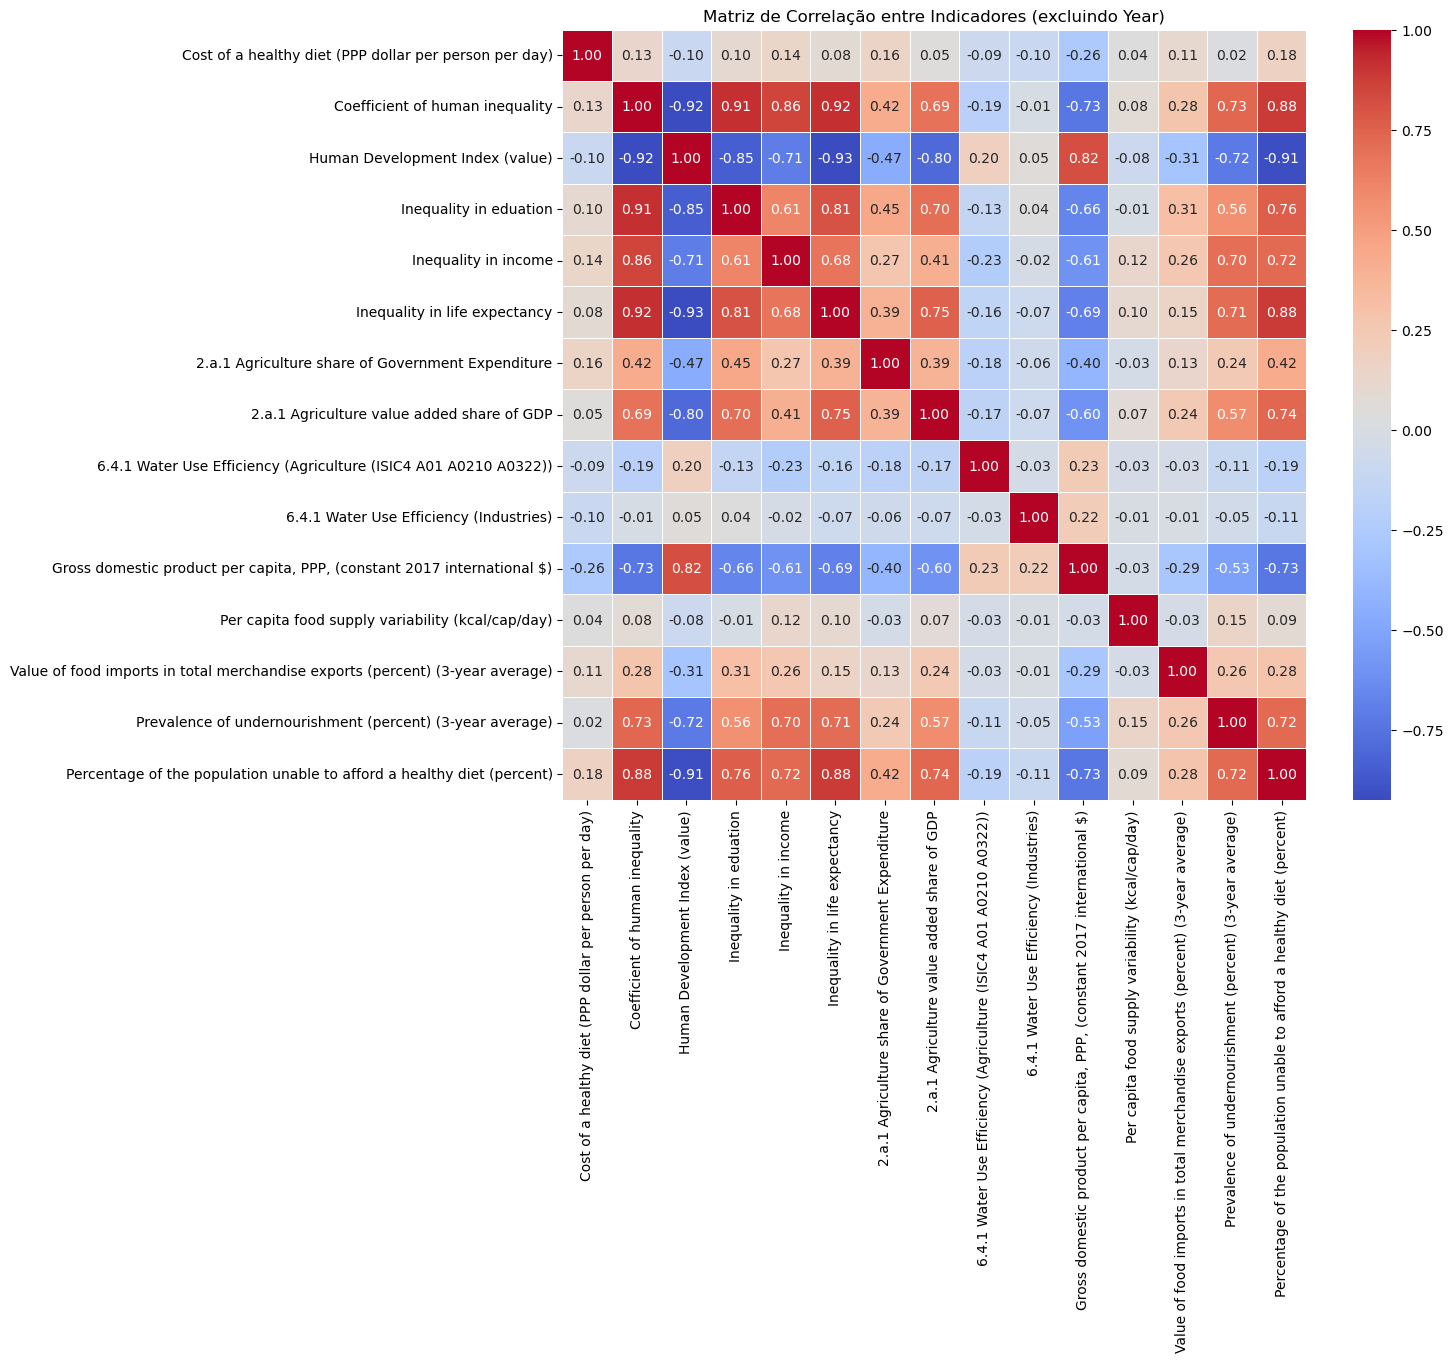

In [19]:
###Novas correlações
# Calcular a matriz de correlação
# Remover 'Year' da lista de colunas numéricas, se presente
df_mapa = df_limpo.drop(columns=['Year'])

# Calcular a matriz de correlação
df_matriz = df_mapa.corr()

# Plotar um mapa de calor (heatmap) da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(df_matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação entre Indicadores (excluindo Year)')
plt.show()

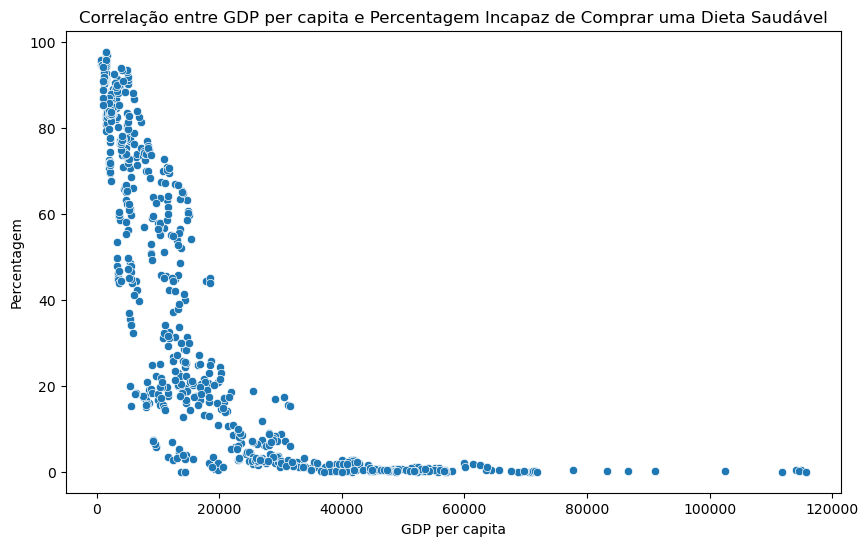

In [20]:
# Gráficos de dispersão para algumas correlações
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gross domestic product per capita, PPP, (constant 2017 international $)', y='Percentage of the population unable to afford a healthy diet (percent)', data=df_limpo)
plt.title('Correlação entre GDP per capita e Percentagem Incapaz de Comprar uma Dieta Saudável')
plt.xlabel('GDP per capita')
plt.ylabel('Percentagem')
plt.show()

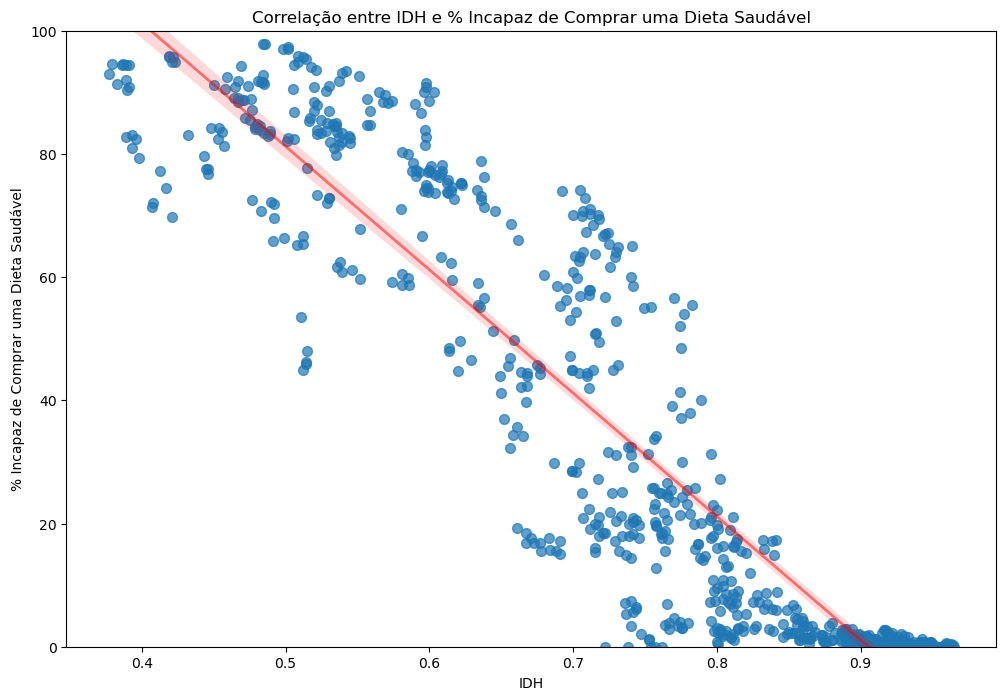

In [21]:
plt.figure(figsize=(12, 8))

# Plot com linha de regressão e intervalo de confiança
sns.regplot(
    x='Human Development Index (value)', 
    y='Percentage of the population unable to afford a healthy diet (percent)', 
    data=df_limpo, 
    scatter_kws={'s': 50, 'alpha': 0.7},  # Customização dos pontos
    line_kws={'color': 'red', 'alpha': 0.5, 'lw': 2}  # Customização da linha
)
plt.ylim(0, 100)  # Limites do eixo y
plt.title('Correlação entre IDH e % Incapaz de Comprar uma Dieta Saudável')
plt.xlabel('IDH')
plt.ylabel('% Incapaz de Comprar uma Dieta Saudável')
plt.show()

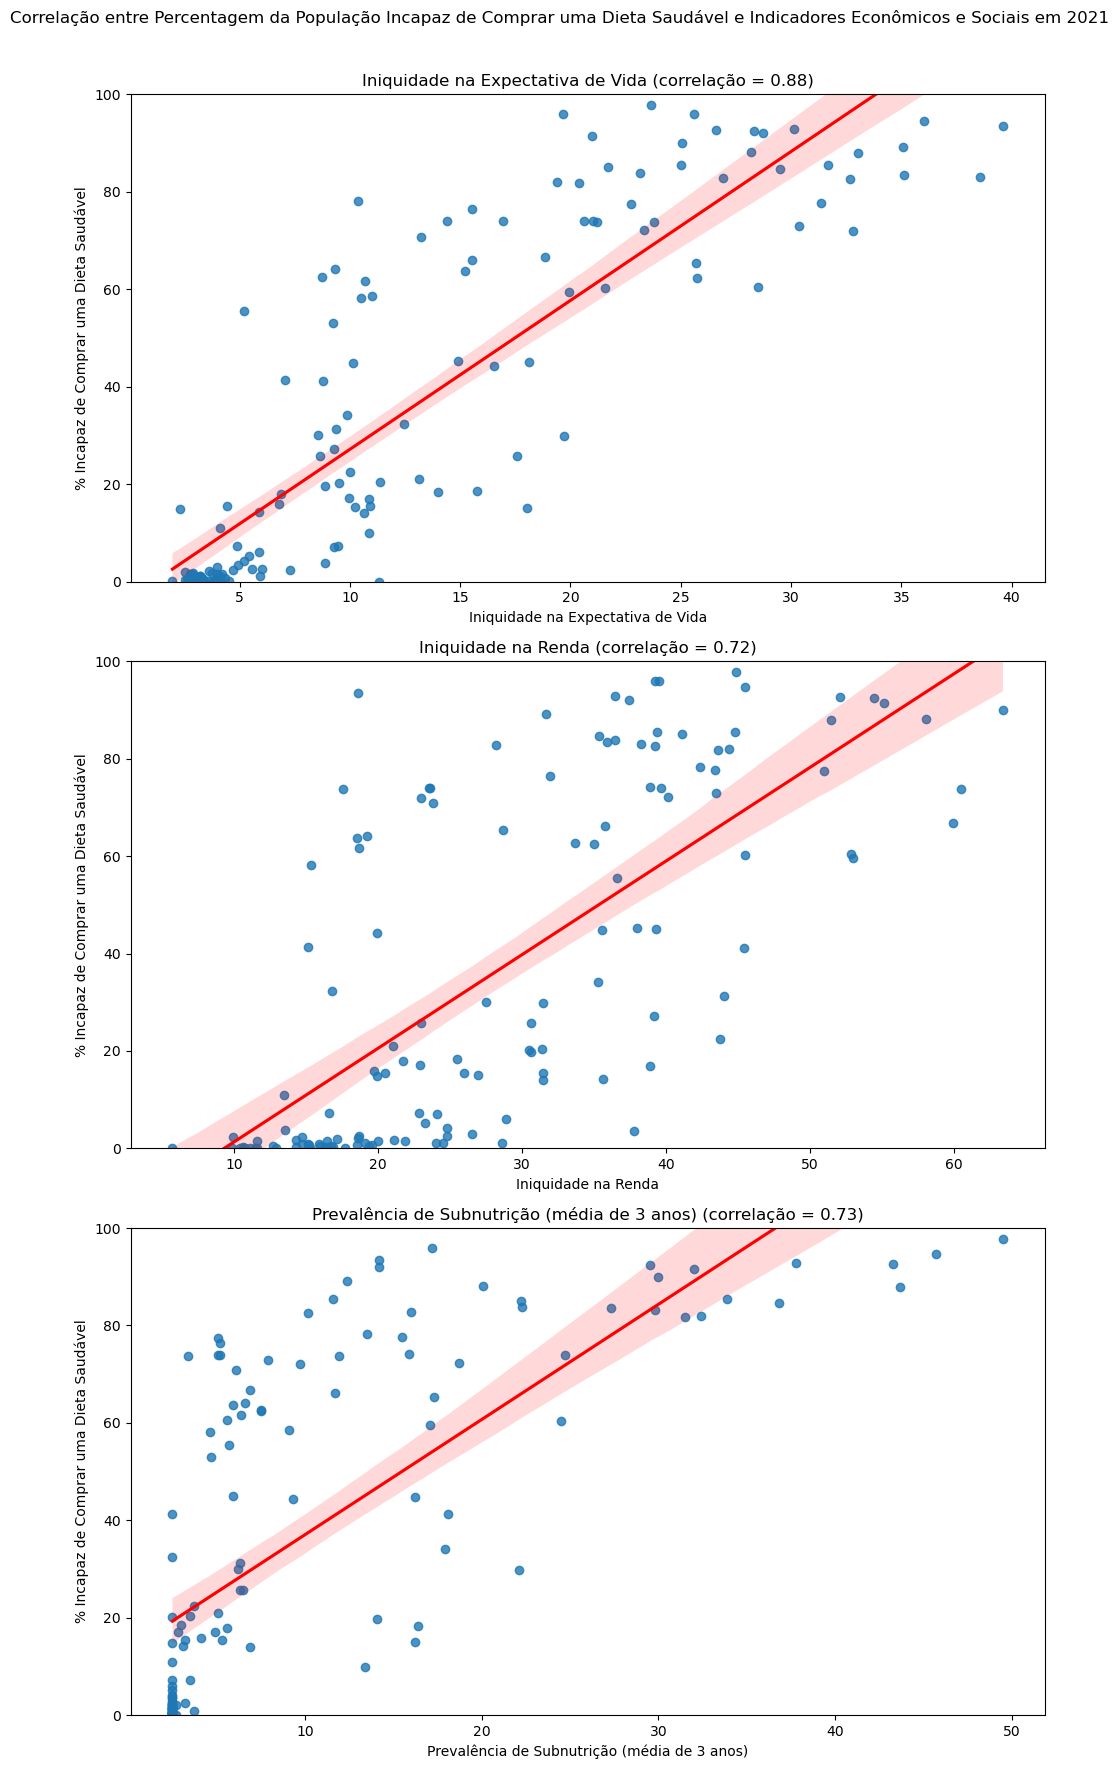

In [28]:
# Calculando correlações
corr_expectativa_vida = df_2021['Percentage of the population unable to afford a healthy diet (percent)'].corr(df_2021['Inequality in life expectancy'])
corr_renda = df_2021['Percentage of the population unable to afford a healthy diet (percent)'].corr(df_2021['Inequality in income'])
corr_subnutricao = df_2021['Percentage of the population unable to afford a healthy diet (percent)'].corr(df_2021['Prevalence of undernourishment (percent) (3-year average)'])

# Configurando o layout dos gráficos
fig, axs = plt.subplots(3, 1, figsize=(10, 18))
fig.suptitle('Correlação entre Percentagem da População Incapaz de Comprar uma Dieta Saudável e Indicadores Econômicos e Sociais em 2021')

# Gráfico de dispersão para Inequidade na Expectativa de Vida
sns.regplot(ax=axs[0], x=df_2021['Inequality in life expectancy'], y=df_2021['Percentage of the population unable to afford a healthy diet (percent)'], line_kws={"color":"red"})
axs[0].set_title(f'Iniquidade na Expectativa de Vida (correlação = {corr_expectativa_vida:.2f})')
axs[0].set_xlabel('Iniquidade na Expectativa de Vida')
axs[0].set_ylabel('% Incapaz de Comprar uma Dieta Saudável')
axs[0].set_ylim(0, 100)

# Gráfico de dispersão para Inequidade na Renda
sns.regplot(ax=axs[1], x=df_2021['Inequality in income'], y=df_2021['Percentage of the population unable to afford a healthy diet (percent)'], line_kws={"color":"red"})
axs[1].set_title(f'Iniquidade na Renda (correlação = {corr_renda:.2f})')
axs[1].set_xlabel('Iniquidade na Renda')
axs[1].set_ylabel('% Incapaz de Comprar uma Dieta Saudável')
axs[1].set_ylim(0, 100)

# Gráfico de dispersão para Prevalência de Subnutrição
sns.regplot(ax=axs[2], x=df_2021['Prevalence of undernourishment (percent) (3-year average)'], y=df_2021['Percentage of the population unable to afford a healthy diet (percent)'], line_kws={"color":"red"})
axs[2].set_title(f'Prevalência de Subnutrição (média de 3 anos) (correlação = {corr_subnutricao:.2f})')
axs[2].set_xlabel('Prevalência de Subnutrição (média de 3 anos)')
axs[2].set_ylabel('% Incapaz de Comprar uma Dieta Saudável')
axs[2].set_ylim(0, 100)

# Ajustando layout
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Exibindo os gráficos
plt.show()

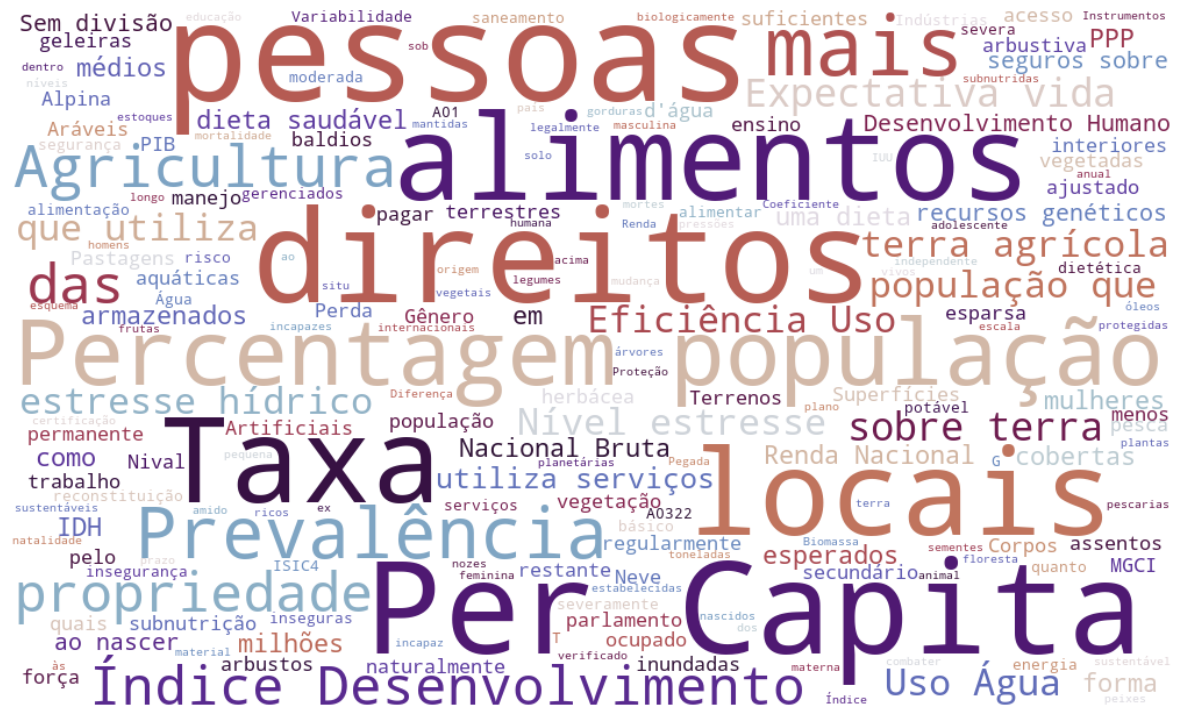

In [25]:
from wordcloud import WordCloud
import re

# Carregar os dados do Excel
df_wordcloud = pd.read_excel('../Trabalho UX/Indicadores.xlsx')

# Concatenar todos os textos em uma única string
texto = ' '.join(df_wordcloud['Indicadores'].astype(str))

# Removendo palavras de conexão e desnecessárias
texto = re.sub(r'\b(à|a|raças|,|algum|a0210|número|sexo|escolaridade|de|estão|custo|valor|desigualdade|e|total|na|Participação|no|ou|da|para|por|Área|Áreas|montanhosa|Proporção|anos|masculino|feminino|florestal)\b', '', texto, flags=re.IGNORECASE)
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',  
    colormap='twilight_shifted', 
    max_font_size=120, 
    min_font_size=10,
    contour_color='black', 
    contour_width=2,
    random_state=42,
    prefer_horizontal=1.0 
).generate(texto)


plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()